Excercise fr Bagging techniqes with a kaggle Heart Disease Dataset

In [1]:
import pandas as pd
import numpy as np


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


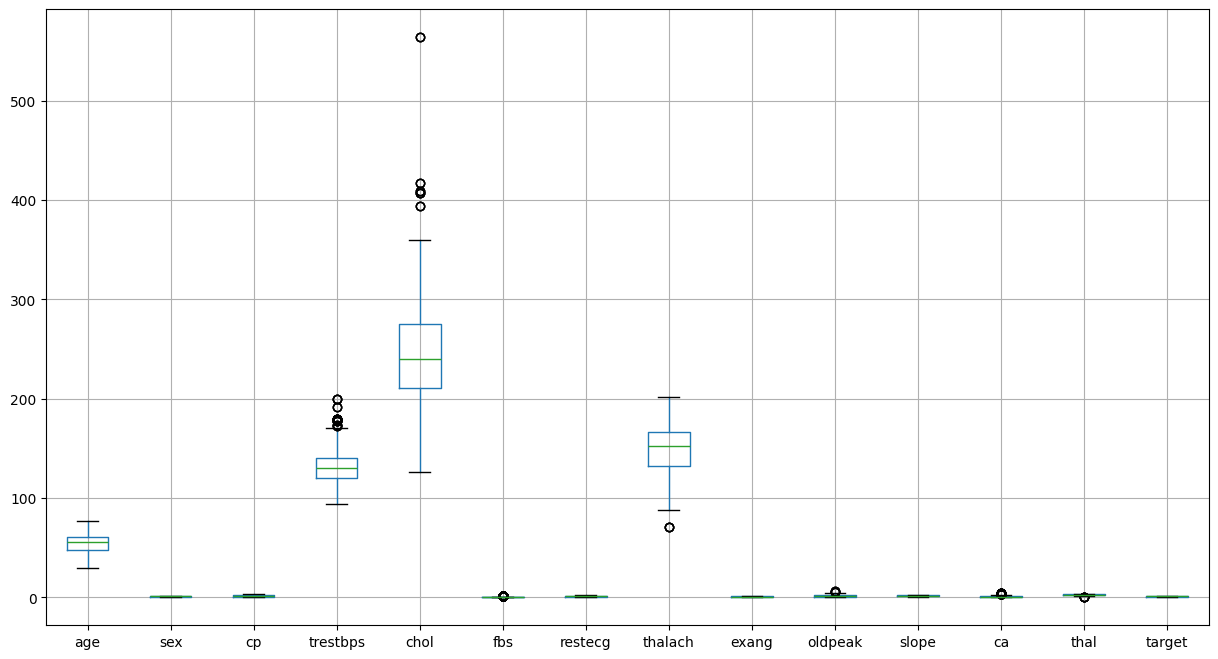

In [7]:
plt.figure(figsize=(15, 8))
df.boxplot()
plt.show()

In [11]:
df.shape

(1025, 14)

In [10]:
df[df['chol'] > (df['chol'].mean() + 3*df['chol'].std())]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
123,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
158,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
179,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
192,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
450,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
464,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
481,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
641,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
665,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
685,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0


In [12]:
df1 = df[df['chol'] <= (df['chol'].mean() + 3*df['chol'].std())]
df1.shape

(1012, 14)

In [13]:
df[df['trestbps'] > (df['trestbps'].mean() + 3*df['trestbps'].std())]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
151,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
175,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
246,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
294,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
326,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
508,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
688,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0


In [14]:
df2 = df1[df1['trestbps'] <= (df1['trestbps'].mean() + 3*df1['trestbps'].std())]
df2.shape

(1005, 14)

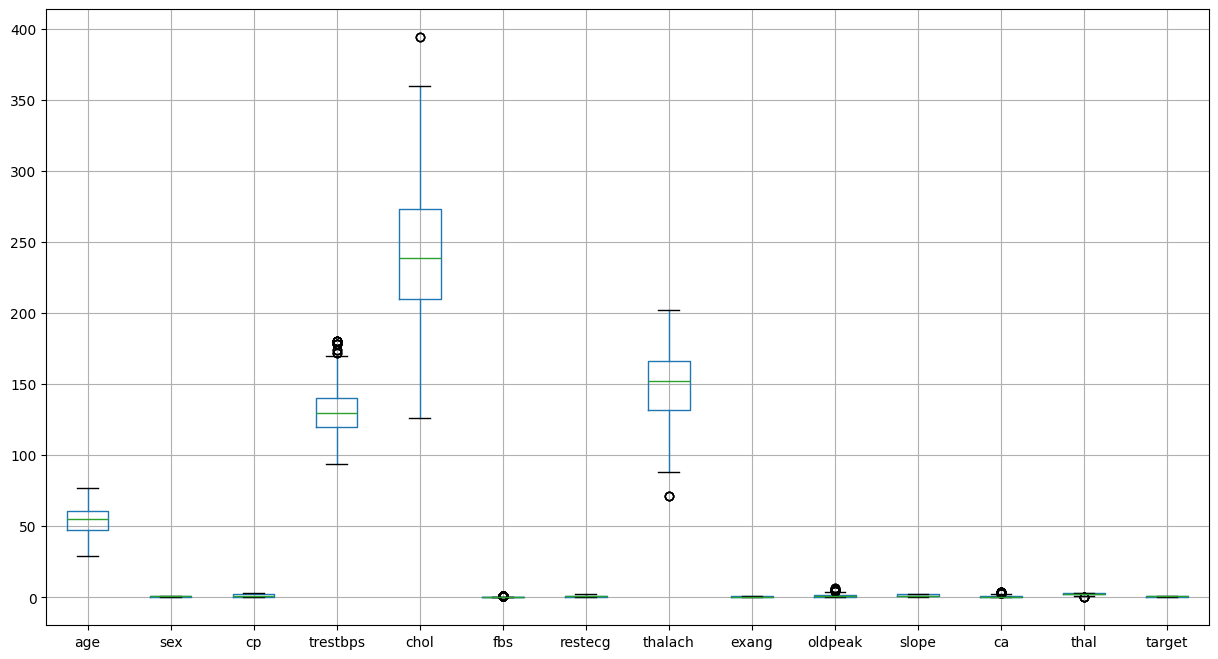

In [16]:
plt.figure(figsize=(15, 8))
df2.boxplot()
plt.show()

In [17]:
X = df2.drop(['target'], axis=1)
y = df2['target']


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled[:2]

array([[-0.25521294,  0.64458743, -0.91746314, -0.36444006, -0.67602985,
        -0.41226821,  0.87151818,  0.82590103, -0.71186138, -0.04173562,
         0.99121043,  1.23260595,  1.10744285],
       [-0.14527338,  0.64458743, -0.91746314,  0.53121269, -0.87144355,
         2.42560542, -1.02431682,  0.2619037 ,  1.40476787,  1.77816146,
        -2.26423558, -0.71974863,  1.10744285]])

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.svm import SVC
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8756218905472637

In [22]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
scores.mean()


0.8437810945273633

In [32]:
from sklearn.tree import DecisionTreeClassifier
model_1 = DecisionTreeClassifier(random_state=42)
model_1.fit(X_train, y_train)
model_1.score(X_test, y_test)

1.0

In [46]:
from sklearn.ensemble import BaggingClassifier
Bagging = BaggingClassifier(estimator=SVC(), n_estimators=100, max_samples=0.8, random_state=42)

scores = cross_val_score(Bagging, X, y, cv=5)
scores.mean()


0.7054726368159203

In [45]:
from sklearn.ensemble import BaggingClassifier
Bagging_1 = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)

scores = cross_val_score(Bagging_1, X, y, cv=5)
scores.mean()

0.9970149253731343

In [41]:
scores_1 = cross_val_score(SVC(), X, y, cv=5)
scores_1.mean()

0.700497512437811

In [42]:
scores_1 = cross_val_score(DecisionTreeClassifier(), X, y, cv=5)
scores_1.mean()

0.9870646766169153

In [39]:
from sklearn.ensemble import RandomForestClassifier

scores = cross_val_score(RandomForestClassifier(), X, y, cv=5)
scores.mean()

0.9970149253731343